In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras import Sequential

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MJO11805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Code to unzip the folder

import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb') # read binary
  for l in g:
    yield eval(l) # fetch the first file in the entire file

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

## Unzipping the files and creating dataframe

In [3]:
beauty_df = getDF('reviews_Beauty_5.json.gz')
grocery_df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
home_df = getDF('reviews_Home_and_Kitchen_5.json.gz')
office_df = getDF('reviews_Office_Products_5.json.gz')
pet_df = getDF('reviews_Pet_Supplies_5.json.gz')

In [4]:
beauty_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"


# To differentiate which group of reviews it goes into

In [5]:
beauty_df['text'] =beauty_df['reviewText'] + beauty_df['summary']
beauty_df['category'] = 0 # beauty =0
beauty_df = beauty_df[['text','category']]
beauty_df = beauty_df.head(53258)

grocery_df['text'] =grocery_df['reviewText'] + grocery_df['summary']
grocery_df['category'] = 1 # grocery = 1
grocery_df = grocery_df[['text','category']]
grocery_df = grocery_df.head(53258)

home_df['text'] =home_df['reviewText'] + home_df['summary']
home_df['category'] = 2 # home = 2
home_df = home_df[['text','category']]
home_df = home_df.head(53258)


office_df['text'] =office_df['reviewText'] + office_df['summary']
office_df['category'] = 3 # office = 3
office_df = office_df[['text','category']]
office_df = office_df.head(53258)


pet_df['text'] =pet_df['reviewText'] + pet_df['summary']
pet_df['category'] = 4 #pet = 4
pet_df = pet_df[['text','category']]
pet_df = pet_df.head(53258)


## Merging all dataframes

In [6]:
df = pd.concat([beauty_df,grocery_df,home_df,office_df,pet_df])

In [7]:
df.shape

(266290, 2)

In [8]:
df['category'].value_counts()

0    53258
1    53258
2    53258
3    53258
4    53258
Name: category, dtype: int64

## Data cleaning

In [10]:
def clean_text(text):
    text= re.sub('[^A-Za-z]',' ',text)
    text = re.sub(r'http\S+',' ',text,flags= re.MULTILINE)
    text = re.sub('\.+',' ',text)
    text =text.lower()
    words = text.split()
    imp_words = [w for w in words if w not in stops]

    return(' '.join(imp_words))

In [11]:
df['clean_text'] = df['text'].apply(lambda x:clean_text(x)) 

In [12]:
df.head()

,text,category,clean_text
0,Very oily and creamy. Not at all what I expect...,0,oily creamy expected ordered try highlight con...
1,This palette was a decent price and I was look...,0,palette decent price looking different shades ...
2,The texture of this concealer pallet is fantas...,0,texture concealer pallet fantastic great cover...
3,I really can't tell what exactly this thing is...,0,really tell exactly thing powder kind oil ish ...
4,"It was a little smaller than I expected, but t...",0,little smaller expected okay lasted long time ...


In [13]:
x = df['clean_text']
y = df['category']

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

## Tokenizer

In [15]:
tok = Tokenizer(oov_token = ' <UNK>')

In [19]:
tok.fit_on_texts(x_train)

In [38]:
len(tok.word_index)

111946

In [40]:
vocab_size = len(tok.word_index) + 1

In [20]:
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [27]:
np.max(df['clean_text'].apply(lambda x:len(x.split())))

3097

(array([62893., 85851., 44855., 25907., 15386.,  9560.,  6303.,  4064.,
         2793.,  2139.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

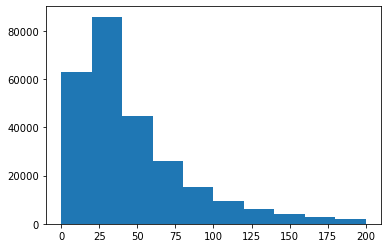

In [30]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range=(0,200))

In [34]:
max_words = 150
embedding_dimension = 300
pad = 'post'
truncat = 'post'

In [37]:
train_padded = pad_sequences(train_sequences,maxlen=max_words,padding=pad,truncating=truncat)
test_padded = pad_sequences(test_sequences,maxlen=max_words,padding=pad,truncating=truncat)

## Model Building

In [42]:
model = Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dimension),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(40,activation='ReLU'),
    tf.keras.layers.Dense(5,activation='softmax')
    ])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         33584100  
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dense (Dense)               (None, 40)                10280     
                                                                 
 dense_1 (Dense)             (None, 5)                 205       
                                                                 
Total params: 34,164,953
Trainable params: 34,164,953
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_padded,y_train,epochs=5,batch_size=500,validation_data=[test_padded,y_test])

Epoch 1/5
427/427 [==============================] - 1496s 4s/step - loss: 0.0704 - accuracy: 0.9797 - val_loss: 0.1609 - val_accuracy: 0.9520
Epoch 2/5
427/427 [==============================] - 1464s 3s/step - loss: 0.0513 - accuracy: 0.9855 - val_loss: 0.1720 - val_accuracy: 0.9505
Epoch 3/5
427/427 [==============================] - 1867s 4s/step - loss: 0.0395 - accuracy: 0.9890 - val_loss: 0.1855 - val_accuracy: 0.9513
Epoch 4/5
427/427 [==============================] - 25479s 60s/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 5/5
427/427 [==============================] - 2189s 5s/step - loss: 0.0262 - accuracy: 0.9928 - val_loss: 0.2298 - val_accuracy: 0.9484


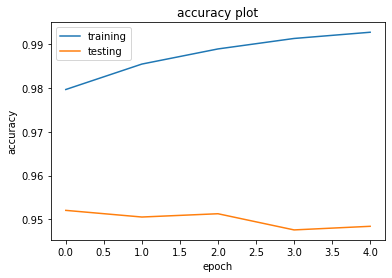

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])

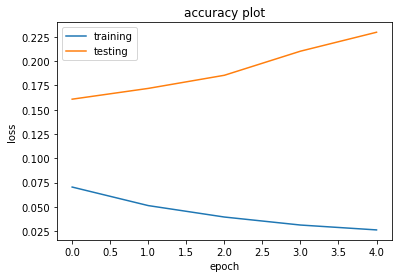

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy plot')
plt.legend(['training','testing'])

# To predict the rating based on review

### Unzipping the files

In [111]:
beauty_df = getDF('reviews_Beauty_5.json.gz')
grocery_df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
home_df = getDF('reviews_Home_and_Kitchen_5.json.gz')
office_df = getDF('reviews_Office_Products_5.json.gz')
pet_df = getDF('reviews_Pet_Supplies_5.json.gz')

In [112]:
beauty_df['text'] =beauty_df['reviewText'] + beauty_df['summary']
beauty_df['category'] = 0 # beauty =0
beauty_df = beauty_df[['text','category','overall']]
#beauty_df = beauty_df.head(53258)

grocery_df['text'] =grocery_df['reviewText'] + grocery_df['summary']
grocery_df['category'] = 1 # grocery = 1
grocery_df = grocery_df[['text','category','overall']]
#grocery_df = grocery_df.head(53258)

home_df['text'] =home_df['reviewText'] + home_df['summary']
home_df['category'] = 2 # home = 2
home_df = home_df[['text','category','overall']]
#home_df = home_df.head(53258)


office_df['text'] =office_df['reviewText'] + office_df['summary']
office_df['category'] = 3 # office = 3
office_df = office_df[['text','category','overall']]
#office_df = office_df.head(53258)


pet_df['text'] =pet_df['reviewText'] + pet_df['summary']
pet_df['category'] = 4 #pet = 4
pet_df = pet_df[['text','category','overall']]
#pet_df = pet_df.head(53258)


### Merging all dataframes

In [113]:
df = pd.concat([beauty_df,grocery_df,home_df,office_df,pet_df])

In [114]:
df.shape

(1112532, 3)

In [115]:
df['category'].value_counts()

2    551682
0    198502
4    157836
1    151254
3     53258
Name: category, dtype: int64

In [116]:
df['overall'] = df['overall'] - 1

In [117]:
df['overall'].value_counts()

4.0    678253
3.0    220857
2.0    105814
1.0     54319
0.0     53289
Name: overall, dtype: int64

### Data cleaning

In [118]:
def clean_text(text):
    text= re.sub('[^A-Za-z]',' ',text)
    text = re.sub(r'http\S+',' ',text,flags= re.MULTILINE)
    text = re.sub('\.+',' ',text)
    text =text.lower()
    words = text.split()
    imp_words = [w for w in words if w not in stops]

    return(' '.join(imp_words))

In [119]:
df['clean_text'] = df['text'].apply(lambda x:clean_text(x)) 

In [120]:
df.head()

,text,category,overall,clean_text
0,Very oily and creamy. Not at all what I expect...,0,0.0,oily creamy expected ordered try highlight con...
1,This palette was a decent price and I was look...,0,2.0,palette decent price looking different shades ...
2,The texture of this concealer pallet is fantas...,0,3.0,texture concealer pallet fantastic great cover...
3,I really can't tell what exactly this thing is...,0,1.0,really tell exactly thing powder kind oil ish ...
4,"It was a little smaller than I expected, but t...",0,2.0,little smaller expected okay lasted long time ...


In [121]:
x1 = df[['clean_text','category']]
y1 = df['overall']

In [122]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,test_size=0.2,random_state=10,shuffle=True)

### Tokenizer

In [123]:
tok = Tokenizer(oov_token = ' <UNK>')

In [124]:
tok.fit_on_texts(x1_train['clean_text'])

In [125]:
len(tok.word_index)

252407

In [126]:
vocab_size = len(tok.word_index) + 1

In [127]:
train_sequences = tok.texts_to_sequences(x1_train['clean_text'])
test_sequences = tok.texts_to_sequences(x1_test['clean_text'])

In [128]:
np.max(df['clean_text'].apply(lambda x:len(x.split())))

3097

(array([285265., 365716., 179502., 100331.,  59237.,  37084.,  24220.,
         16153.,  11199.,   8353.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

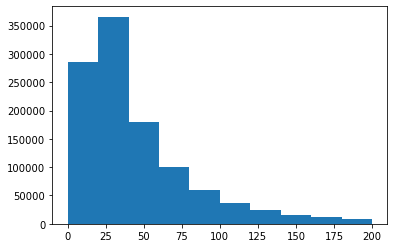

In [129]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range=(0,200))

In [130]:
max_words = 150
embedding_dimension = 300
pad = 'post'
truncat = 'post'

In [131]:
train_padded = pad_sequences(train_sequences,maxlen=max_words,padding=pad,truncating=truncat)
test_padded = pad_sequences(test_sequences,maxlen=max_words,padding=pad,truncating=truncat)

## Model Building

In [132]:
model = Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dimension),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(40,activation='ReLU'),
    tf.keras.layers.Dense(5,activation='softmax')
    ])

In [133]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         75722400  
                                                                 
 lstm_5 (LSTM)               (None, 256)               570368    
                                                                 
 dense_10 (Dense)            (None, 40)                10280     
                                                                 
 dense_11 (Dense)            (None, 5)                 205       
                                                                 
Total params: 76,303,253
Trainable params: 76,303,253
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [135]:
history = model.fit(train_padded,y1_train,epochs=3,batch_size=500,validation_data=[test_padded,y1_test])

Epoch 1/3
1781/1781 [==============================] - 8098s 5s/step - loss: 1.0934 - accuracy: 0.6153 - val_loss: 0.8309 - val_accuracy: 0.6618
Epoch 2/3
1781/1781 [==============================] - 8748s 5s/step - loss: 0.7422 - accuracy: 0.7030 - val_loss: 0.7204 - val_accuracy: 0.7126
Epoch 3/3
1781/1781 [==============================] - 9133s 5s/step - loss: 0.6584 - accuracy: 0.7359 - val_loss: 0.7196 - val_accuracy: 0.7172


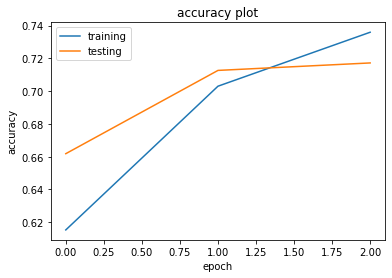

In [136]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])

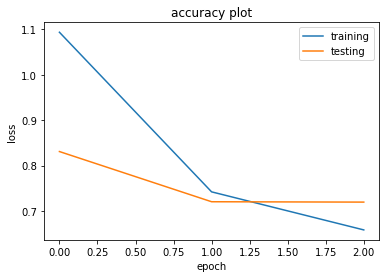

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy plot')
plt.legend(['training','testing'])

In [138]:
model.save('LSTM.h5')

In [139]:
import pickle

with open('tok.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)